In [94]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Test Data Set

In [95]:
from sklearn.datasets import load_breast_cancer

In [96]:
data = load_breast_cancer()

In [97]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [98]:
data_df = pd.DataFrame(data=data['data'], columns=data['feature_names'])

In [99]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scale the test-data set so that each feature has single unit variance 

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_df)
data_df = scaler.transform(data_df)

In [101]:
data_df.shape

(569, 30)

### PCA Implementation 

In [102]:
def linear_pca(k, X):
    """
    Using direct eigen value computation
    :param k --> dimension at the end
    :inputs X --> (x1, x2, ... xn)  --> d x n
    
    """
    X = X.T
    # step1: compute sample mean 
    d, N = X.shape
    mu = np.sum(X, axis=1)/N
    #print(mu)
    # step2: subtract mu for each data point 
    mu = mu.reshape(-1, 1)
    X = X - mu 
    # step3: compute scatter matrix S_n := XX^T
    s_n = np.dot(X, X.T)
    # step4: Compute k- largest eigen values of scatter matrix 
    eigen_val, eigen_vec = linalg.eigh(s_n, eigvals=(s_n.shape[0]-k, s_n.shape[0]-1))
    #
    #print(linalg.eigh(s_n))
    #print(eigen_vec)
    #
    # step 5: return dimensional reduced data
    W = eigen_vec.T
    #print(W)
    X_tilde = np.dot(W, X)
    #print(X)
    return X_tilde.T

In [103]:
def linear_pca_svd(X, k):
    X = X.T
    d, N = X.shape
    mu = np.sum(X, axis=1)/N
    mu = mu.reshape(-1, 1)
    X = X - mu 
    u, sigma, v = np.linalg.svd(X, full_matrices=False) # returns eigen vector in row
    ### sign flip 
#     max_abs_cols = np.argmax(np.abs(u), axis=0)
#     signs = np.sign(u[max_abs_cols, range(u.shape[1])])
#     u *= signs
#     v *= signs[:, np.newaxis]
    ###
    W = u.T[:, :k]
    X_projected = np.dot(W.T, X)
    
    return X_projected.T, u.

In [104]:
reduced_data_df, eigen_vec = linear_pca_svd(data_df, 2)

In [105]:
reduced_data_df.shape

(569, 2)

Text(0, 0.5, 'Second principle component')

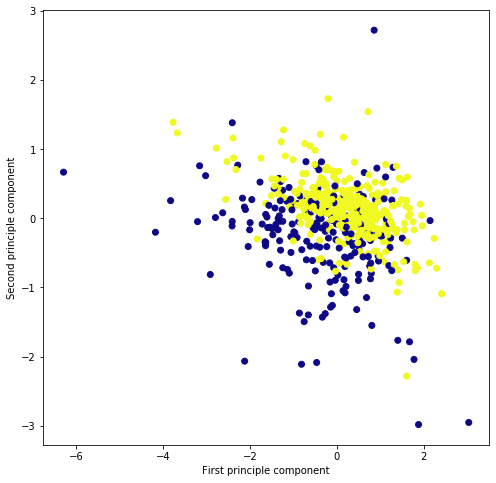

In [106]:
plt.figure(figsize=(8,8))
plt.scatter(reduced_data_df[:, 0], reduced_data_df[:, 1], c=data['target'], cmap="plasma")
plt.xlabel("First principle component")
plt.ylabel("Second principle component")

In [111]:
eigen_vec.shape

(30, 30)

In [107]:
data_df_eigen = pd.DataFrame(eigen_vec, columns=data["feature_names"])

In [108]:
data_df_eigen.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.218902,-0.103725,-0.227537,-0.220995,-0.142590,-0.239285,-0.258400,-0.260854,-0.138167,-0.064363,...,-0.227997,-0.104469,-0.236640,-0.224871,-0.127953,-0.210096,-0.228768,-0.250886,-0.122905,-0.131784
1,0.233857,0.059706,0.215181,0.231077,-0.186113,-0.151892,-0.060165,0.034768,-0.190349,-0.366575,...,0.219866,0.045467,0.199878,0.219352,-0.172304,-0.143593,-0.097964,0.008257,-0.141883,-0.275339
2,0.008531,-0.064550,0.009314,-0.028700,0.104292,0.074092,-0.002734,0.025564,0.040240,0.022574,...,0.047507,0.042298,0.048547,0.011902,0.259798,0.236076,0.173057,0.170344,0.271313,0.232791
3,-0.041409,0.603050,-0.041983,-0.053434,-0.159383,-0.031795,-0.019123,-0.065336,-0.067125,-0.048587,...,-0.015417,0.632808,-0.013803,-0.025895,-0.017652,0.091328,0.073951,-0.006007,0.036251,0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423


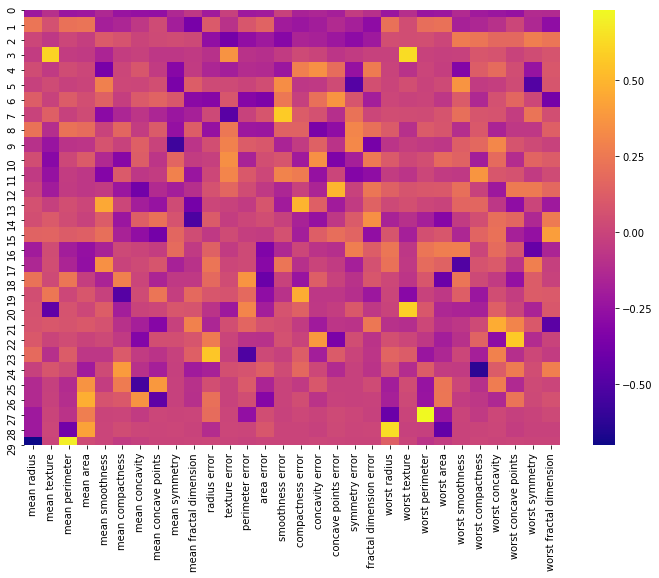

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(data_df_eigen, cmap="plasma")

#### Using eigen_value

In [53]:
reduced_data_df = linear_pca_svd(data_df, 2)

In [54]:
reduced_data_df.shape

(569, 2)

Text(0, 0.5, 'Second principle component')

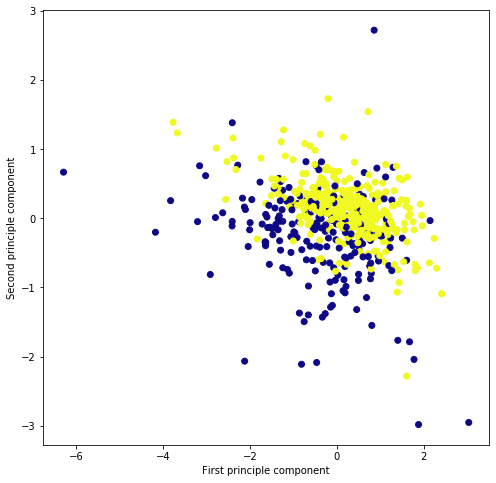

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(reduced_data_df[:, 0], reduced_data_df[:, 1], c=data['target'], cmap="plasma")
plt.xlabel("First principle component")
plt.ylabel("Second principle component")

### Comparison with sklearn lib

Text(0, 0.5, 'Second principle component')

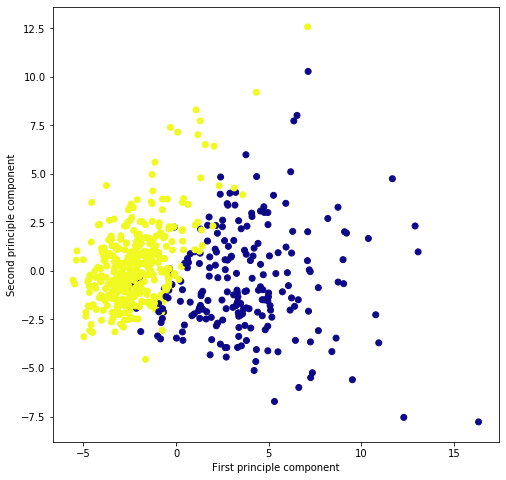

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_df)
reduced_data_df = pca.transform(data_df)
plt.figure(figsize=(8,8))
plt.scatter(reduced_data_df[:, 0], reduced_data_df[:, 1], c=data['target'], cmap="plasma")
plt.xlabel("First principle component")
plt.ylabel("Second principle component")
